In [26]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# Tells notebook to render figures in-page.
%matplotlib inline  
from IPython.display import Image

Image size is  (242, 474, 3)
Data type of image is  uint8


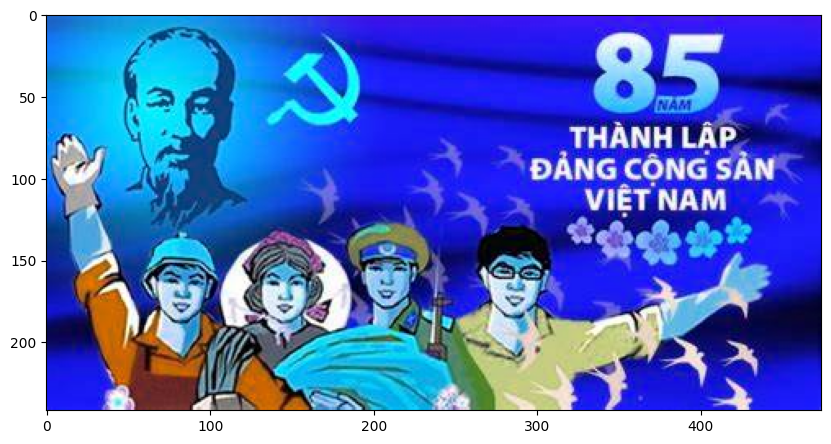

In [27]:
# Read the image
img = cv2.imread('sample_image.jpeg', 1)

# Print the size of image.
print('Image size is ', img.shape)

# Print data-type of image.
print('Data type of image is ', img.dtype)

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(img)

# QUESTION 1: Color Image

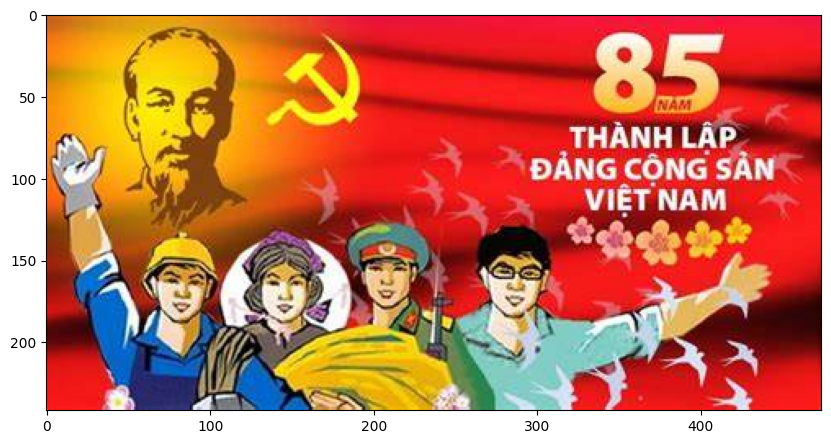

In [28]:
# Swap the Red and Blue color channels.
img = img[:, :, ::-1]

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(img)

In [29]:
# Extract the blue channel
blue = img[:,:,0]

# Save the blue channel as a grayscale image
cv2.imwrite("Ablue.jpg", blue)

True

In [30]:
# Extract the red channel
red = img[:,:,2]

# Save the red channel as a grayscale image
cv2.imwrite("Ared.jpg", red)

True

Which channel would you use if you want to detect the object?
-> The choice of channel depends on the method and the type of image that I'm using. In this case, I would go with the Blue channel since the overwhelming Red color in the image is removed and thereby patterns of objects emerge clearer in the image.

# Question 2: Working with pixel

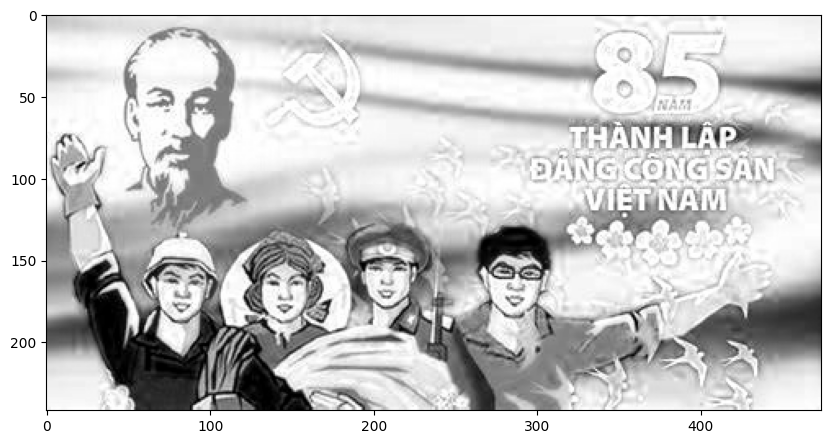

In [31]:
# Read the image
Ablue = cv2.imread('Ablue.jpg', 1)

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(Ablue)

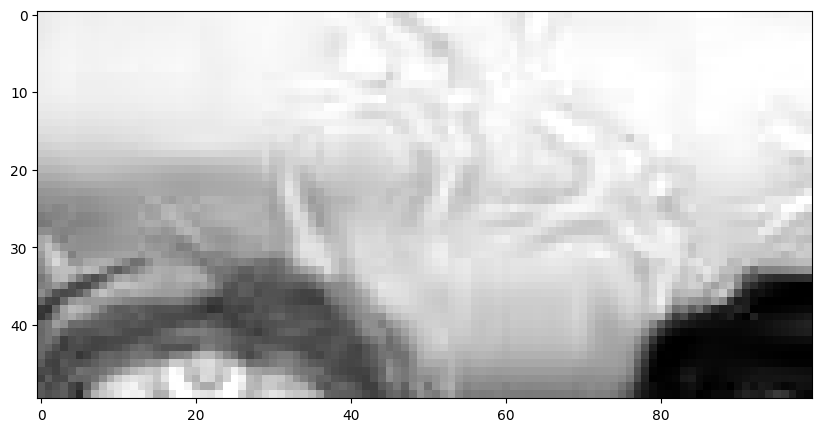

In [32]:
# Take the inner square of 50x100 pixels (that’s 50 rows by 100 columns – a horizontal image) of Ablue
h, w = Ablue.shape[:2] # get height and width of image
x1 = w//2 - 50 # left x coordinate
y1 = h//2 - 25 # top y coordinate
x2 = x1 + 100 # right x coordinate
y2 = y1 + 50 # bottom y coordinate
crop_Ablue = Ablue[y1:y2, x1:x2] # crop image using slicing

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(crop_Ablue)

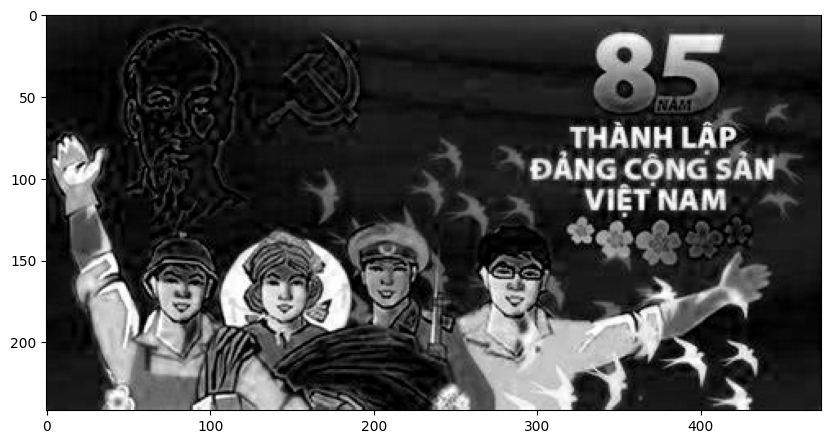

In [33]:
# Read the image
Ared = cv2.imread('Ared.jpg', 1)

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(Ared)

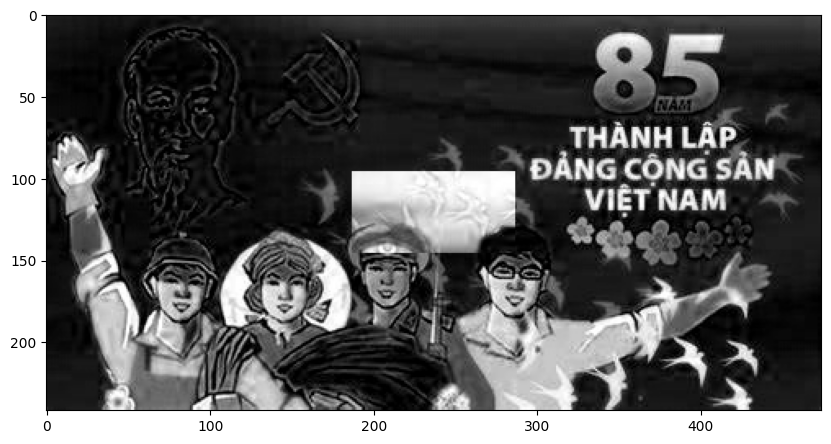

In [34]:
# Insert crop_Ablue into the corresponding position of Ared
h_Ared, w_Ared = Ared.shape[:2] # get height and width of destination image
x_Ared = w_Ared//2 - 50 # left x coordinate for pasting
y_Ared = h_Ared//2 - 25 # top y coordinate for pasting
insert_Ared = Ared
insert_Ared[y_Ared:y_Ared+50, x_Ared:x_Ared+100] = crop_Ablue # paste cropped image using assignment

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(insert_Ared)

# Question 3: Arithmetic and Geometric operation

[[128 128 127 ...  93  92  92]
 [126 126 125 ...  92  92  92]
 [123 123 123 ...  91  92  92]
 ...
 [ 92  92  92 ...  94  97  97]
 [116  94  91 ...  96  93 116]
 [116  94  91 ...  96  93 116]]
Image size is  (242, 474)
Data type of image is  uint8


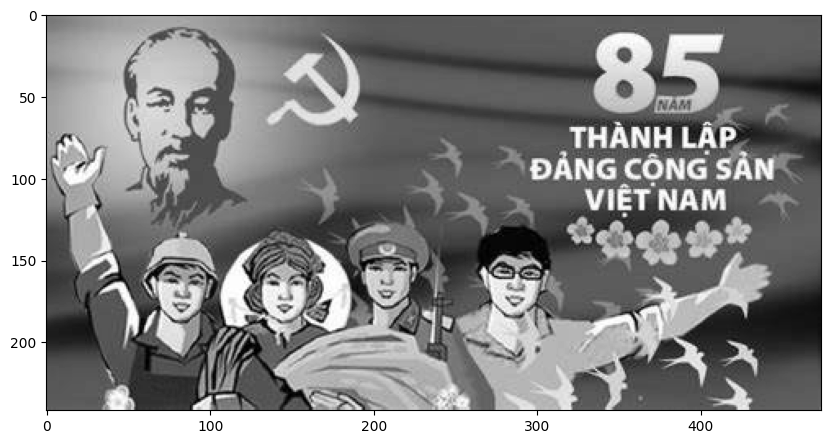

In [38]:
# Convert input image to a grayscale image (called Agray)

# Read image as grayscale.
Agray = cv2.imread('sample_image.jpeg', cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values) of a 2D NumPy array.
print(Agray)

# Print the size of image.
print('Image size is ', Agray.shape)

# Print data-type of image.
print('Data type of image is ', Agray.dtype)

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(Agray, cmap = 'gray')

a. What are the min and max of the pixel values of Agray? What is the mean? What is the standard 
deviation? \n

-> Min value: 0.0, Max value: 255.0 \n

-> Mean value: 120, Standard deviation value: 59.4

In [39]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(Agray) # find min and max values and locations
mean_val, std_val = cv2.meanStdDev(Agray) # find mean and standard deviation values
print(f'Min value: {min_val}, Max value: {max_val}') # print min and max values
print(f'Mean value: {mean_val}, Standard deviation value: {std_val}') # print mean and standard deviation values

Min value: 0.0, Max value: 255.0
Mean value: [[119.94576664]], Standard deviation value: [[58.39224552]]


b. Subtract the mean from all the pixels, then divide by the standard deviation, then multiply by 10 (if your 
image is zero to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in. 

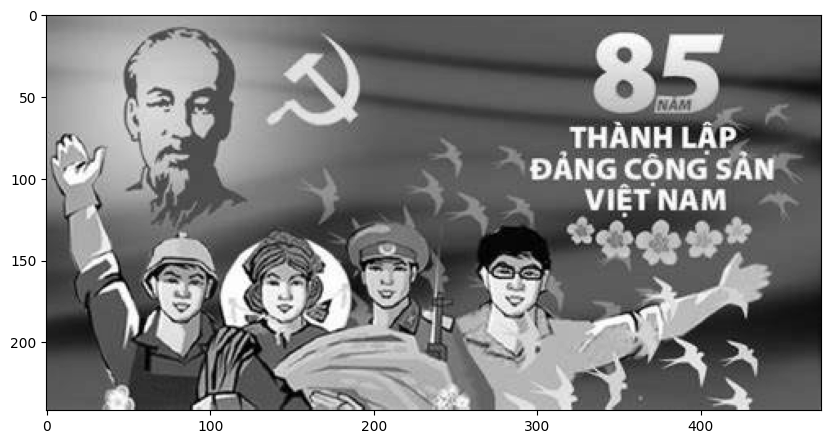

In [40]:
b_Agray = ((Agray - mean_val) / std_val * 10) + mean_val

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(b_Agray, cmap = 'gray')

c. Shift Agray to the left by 5 pixels.

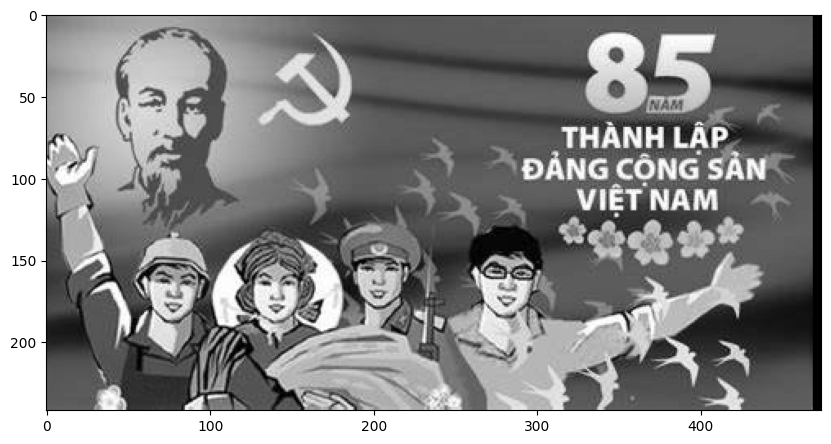

In [45]:
num_rows, num_cols = Agray.shape[:2]

translation_matrix = np.float32([ [1,0,-5], [0,1,0] ])
Agray_translation = cv2.warpAffine(Agray, translation_matrix, (num_cols, num_rows))

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(Agray_translation, cmap = 'gray')

d. Subtract the shifted version of Agray from the original and make sure that the values are legal (be aware 
of negative values).  

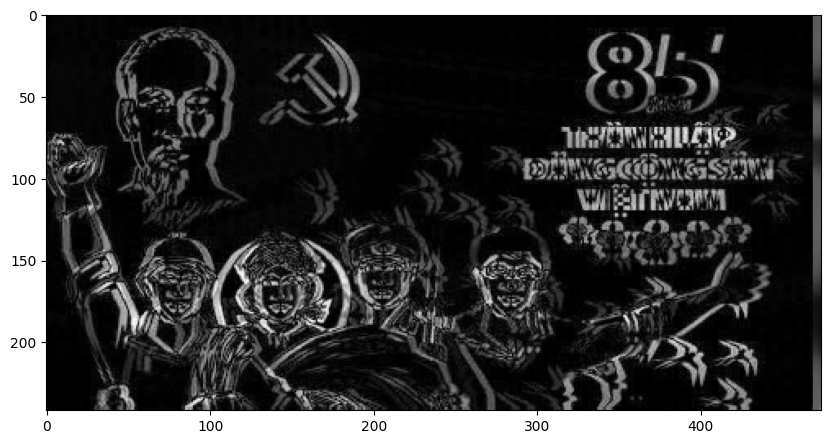

In [46]:
Agray_subtract = cv2.absdiff(Agray, Agray_translation)

# Display the image.
plt.figure(figsize = (10, 10))
plt.imshow(Agray_subtract, cmap = 'gray')